<a href="https://colab.research.google.com/github/Eliottusa/Augereau_Eliott_Exercice1_JS/blob/main/Augereau_Eliott_tp_collecte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import des librairies ##

In [ ]:
#Imports librairies de base
import numpy as np
import pandas as pd

#Affichage de Graphes
from IPython.display import Markdown, display, HTML
import matplotlib.pyplot as plt

#Information Mutuelle
from sklearn.feature_selection import mutual_info_regression


## 1. Lecture des données ##

1.1 Charger les données d'apprentissage (Data/passagers.csv) dans un DataFrame nommé train. Afficher 10 exemples.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train = pd.read_csv('/content/drive/MyDrive/B3_Collecte_Donnée/TP/Data/passagers.csv', index_col=0)

print(train.head(10))

             Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   
6                   0       3   
7                   0       1   
8                   0       3   
9                   1       3   
10                  1       2   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   
6                                          

1.2 Charger les données d'apprentissage (Data/test.csv) dans un Dataframe nommé test. Afficher 10 exemples.

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/B3_Collecte_Donnée/TP/Data/test.csv')

print(test.head(10))

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   
5          897       3                    Svensson, Mr. Johan Cervin    male   
6          898       3                          Connolly, Miss. Kate  female   
7          899       2                  Caldwell, Mr. Albert Francis    male   
8          900       3     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  female   
9          901       3                       Davies, Mr. John Samuel    male   

    Age  SibSp  Parch     Ticket     Fare Cabin Embarked  
0  34.5      0      0     330911   7.8292   NaN        Q  
1

1.3 Afficher les informations des deux DataFrames train et Test.

In [ ]:
train.info()
print("-"*50)
test.info()


<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   N

1.4 Calculer le taux global de survie

In [ ]:
survival_rate = train['Survived'].mean()
print(f"Taux global de survie : {survival_rate * 100:.2f}%")

Taux global de survie : 38.38%


#### Question 1 : Quel Travail voyez-vous pour que les données soient prêtes à faire tourner dans un modèle ?

Il faut préparer les données au préalable, c'est à dire, gérer les valeurs manquantes, encoder certaines variables, normaliser les données numériques, créer de nouvelles features ou encore séparer les données d'entrainement et de test. le tout en utilisant des méthodes comme .info() ou .describe() par exemple.


#### Question 2 : Quelle différence y-a-t'il entre les données train et les données test ?

Le jeu train contient les données avec la colonne “Survived”, alors que le jeu test ne contient que les caractéristiques sans la colonne “Survived”.Train sert donc à l'apprentisssage et test sert à la prédiction


#### Question 3 : Quel est le rôle de ces deux sets de données ?

Comme dit juste avant, Le set train sert à entraîner le modèle et le set test sert à évaluer ses performances sur de nouvelles données.



## 2. Analyse des features

2.1 Analyser l'effet de la variable Classe sur le taux de survie, en affichant le % de survie par classe

In [ ]:
survie_par_classe = train.groupby("Pclass")["Survived"].mean() * 100
print(survie_par_classe)

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


2.2 Analyser l'effet de la variable Genre (Sex) sur le taux de survie, en affichant le % de survie par classe

In [ ]:
survie_par_genre = train.groupby("Sex")["Survived"].mean() * 100
print(survie_par_genre)

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


2.3 Calculer une nouvelle colonne FamilySize contenant la taille de la famille, pour les DataFrame train et Test. Afficher pour 10 exemples l'Id du passager, le nom, l'age, le sexe et la taille de la famille.

In [14]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
print(train[["Name", "Age", "Sex", "FamilySize"]].head(10))



                                                          Name   Age     Sex  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris  22.0    male   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0  female   
3                                       Heikkinen, Miss. Laina  26.0  female   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0  female   
5                                     Allen, Mr. William Henry  35.0    male   
6                                             Moran, Mr. James   NaN    male   
7                                      McCarthy, Mr. Timothy J  54.0    male   
8                               Palsson, Master. Gosta Leonard   2.0    male   
9            Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  27.0  female   
10                         Nasser, Mrs. Nicholas (Adele Achem)  14.0  female   

             FamilySize  
PassengerId  

2.4 Visualisez le nombre de personnes et le taux de survie par taille de famille.

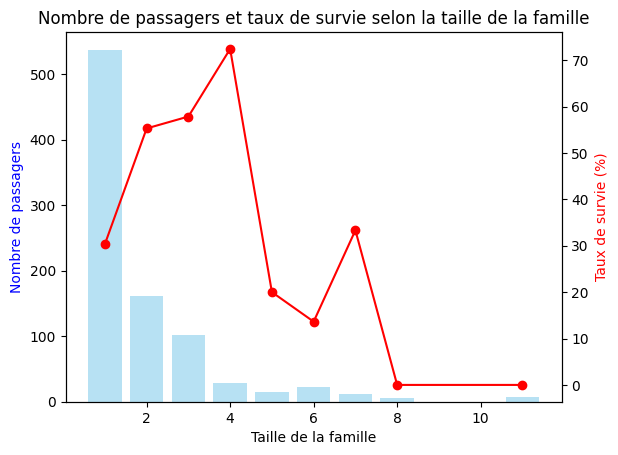

In [11]:
import matplotlib.pyplot as plt

# Nombre de personnes par taille de famille
family_counts = train["FamilySize"].value_counts().sort_index()

# Taux de survie par taille de famille
family_survival = train.groupby("FamilySize")["Survived"].mean() * 100

# Affichage combiné
fig, ax1 = plt.subplots()

ax1.bar(family_counts.index, family_counts.values, alpha=0.6, color='skyblue', label='Nombre de passagers')
ax1.set_xlabel("Taille de la famille")
ax1.set_ylabel("Nombre de passagers", color='blue')

ax2 = ax1.twinx()
ax2.plot(family_survival.index, family_survival.values, color='red', marker='o', label='Taux de survie (%)')
ax2.set_ylabel("Taux de survie (%)", color='red')

plt.title("Nombre de passagers et taux de survie selon la taille de la famille")
plt.show()


2.5 Calculer une nouvelle colonne IsAlone indiquant si le passager est seul ou pas, pour les DataFrame train et Test. Afficher pour 10 exemples l'Id du passager, le nom, l'age, le sexe et le status IsAlone.

In [22]:
# on ajoute Family size a test également
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

train["IsAlone"] = (train["FamilySize"] == 1).astype(int)
test["IsAlone"] = (test["FamilySize"] == 1).astype(int)
print(test[["Name", "Age", "Sex", "IsAlone"]].head(10))
print(train[["Name", "Age", "Sex", "IsAlone"]].head(10))


                                           Name   Age     Sex  IsAlone
0                              Kelly, Mr. James  34.5    male        1
1              Wilkes, Mrs. James (Ellen Needs)  47.0  female        0
2                     Myles, Mr. Thomas Francis  62.0    male        1
3                              Wirz, Mr. Albert  27.0    male        1
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  22.0  female        0
5                    Svensson, Mr. Johan Cervin  14.0    male        1
6                          Connolly, Miss. Kate  30.0  female        1
7                  Caldwell, Mr. Albert Francis  26.0    male        0
8     Abrahim, Mrs. Joseph (Sophie Halaut Easu)  18.0  female        1
9                       Davies, Mr. John Samuel  21.0    male        0
                                                          Name   Age     Sex  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Har

2.6 Visualisez le nombre de personnes et le taux de survie par statut seul ou pas.

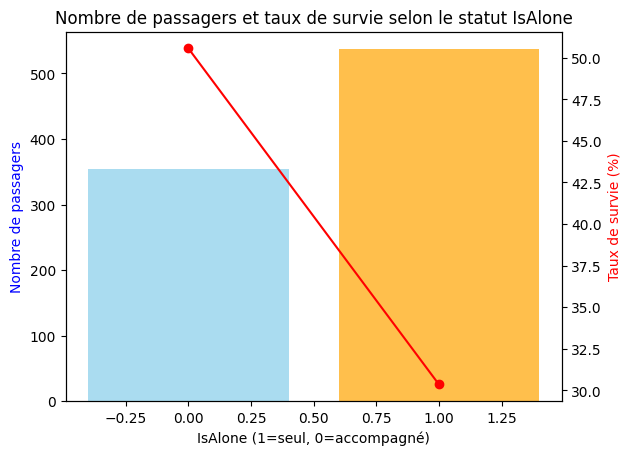

In [23]:
alone_counts = train["IsAlone"].value_counts()
alone_survival = train.groupby("IsAlone")["Survived"].mean() * 100

fig, ax1 = plt.subplots()
ax1.bar(alone_counts.index, alone_counts.values, color=['orange', 'skyblue'], alpha=0.7)
ax1.set_xlabel("IsAlone (1=seul, 0=accompagné)")
ax1.set_ylabel("Nombre de passagers", color='blue')

ax2 = ax1.twinx()
ax2.plot(alone_survival.index, alone_survival.values, color='red', marker='o')
ax2.set_ylabel("Taux de survie (%)", color='red')

plt.title("Nombre de passagers et taux de survie selon le statut IsAlone")
plt.show()


2.7 Calculer l'information mutuelle sur les données train.

Attention : Il y a des données continues et des données discrètes

Ignorer les colonnes Name, Ticket et Cabin

In [25]:
from sklearn.feature_selection import mutual_info_classif

# On retire les colonnes inutiles
X = train.drop(columns=["Survived", "Name", "Ticket", "Cabin"])
y = train["Survived"]

# Remplir les valeurs manquantes (temporaires)
for col in X.columns:
    if X[col].dtype == 'object':
        X[col].fillna("Missing", inplace=True)  # pour les variables catégorielles
    else:
        X[col].fillna(X[col].mean(), inplace=True)  # pour les numériques

# Encoder les catégories en nombres
for col in X.columns:
    if X[col].dtype == 'object':
        X[col], _ = X[col].factorize()

# Identifier les colonnes discrètes
discrete_features = X.dtypes == int

# Calcul de l'information mutuelle
mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
mi = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

print(mi)



Sex           0.150870
Fare          0.141012
Pclass        0.058107
FamilySize    0.047781
SibSp         0.023197
IsAlone       0.020593
Embarked      0.016668
Parch         0.016366
Age           0.009917
dtype: float64


/tmp/ipython-input-1318806438.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[col].fillna(X[col].mean(), inplace=True)  # pour les numériques
/tmp/ipython-input-1318806438.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

2.8 Afficher dans un graphique les scores d'information mutuelle par feature

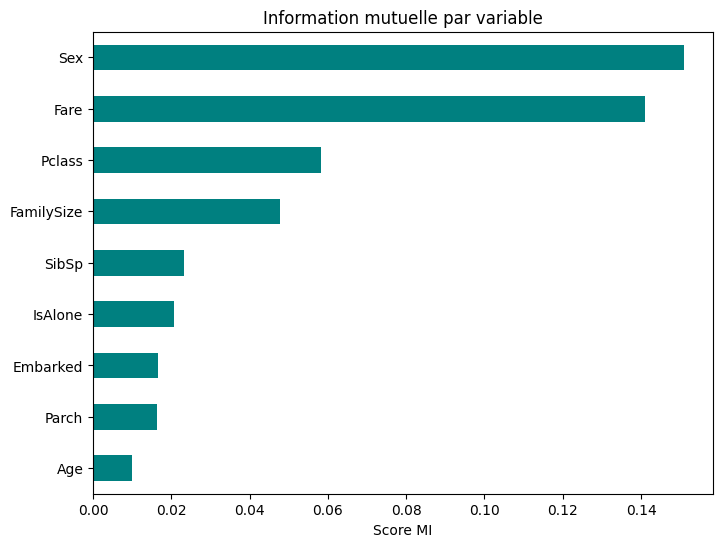

In [26]:
mi.sort_values().plot.barh(figsize=(8,6), color='teal')
plt.title("Information mutuelle par variable")
plt.xlabel("Score MI")
plt.show()


### Question 1 : La variable Classe est-elle utile pour prévoir la survie ? Pourquoi ?

Oui, car les passagers de 1ʳᵉ classe ont un taux de survie plus élevé, donc la classe influence la survie.

### Question 2 : Même question pour la variable Sex
Oui, les femmes ont survécu beaucoup plus souvent (effet majeur sur la prédiction).

### Question 3 : Comment traiter le variables liées à la famille du passager ?

On crée de nouvelles variables comme FamilySize et IsAlone pour mieux capturer leur effet.



## 3. Traitement des données manquantes (à faire sur les données Train et Test)

3.1 La variable "Embarked" possède des valeurs nulles, compléter par la valeur majoritaire (S).

In [28]:
train["Embarked"].fillna("S", inplace=True)
test["Embarked"].fillna("S", inplace=True)


/tmp/ipython-input-581618917.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test["Embarked"].fillna("S", inplace=True)


3.2 Afficher l'influence du port d'embarquement sur la Survie

In [29]:
embarked_survival = train.groupby("Embarked")["Survived"].mean() * 100
print(embarked_survival)


Embarked
C    55.357143
Q    38.961039
S    33.900929
Name: Survived, dtype: float64


3.3 La variable "Fare" (prix du ticket) possède des valeurs manquantes. Remplacer ces valeurs par la valeur médiane.

In [31]:
test["Fare"].fillna(test["Fare"].median(), inplace=True)


/tmp/ipython-input-1473207577.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test["Fare"].fillna(test["Fare"].median(), inplace=True)


3.4 Créer une variable CategoricalFare Découpant la valeur de ticket en 4 catégories de tailles à peu près égales.

In [32]:
train["CategoricalFare"] = pd.qcut(train["Fare"], 4)
test["CategoricalFare"] = pd.qcut(test["Fare"], 4)


3.5 Analyser l'effet de ces catégories de prix de ticket sur la survie.

In [33]:
fare_survival = train.groupby("CategoricalFare")["Survived"].mean() * 100
print(fare_survival)


CategoricalFare
(-0.001, 7.91]     19.730942
(7.91, 14.454]     30.357143
(14.454, 31.0]     45.495495
(31.0, 512.329]    58.108108
Name: Survived, dtype: float64


/tmp/ipython-input-3790745178.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fare_survival = train.groupby("CategoricalFare")["Survived"].mean() * 100


3.6 Combien de valeurs d'Age manquent ? Complète par des valeurs entières aléatoires entre (moyenne - écart type) et (moyenne + écart type).

In [35]:

avg_age = train["Age"].mean()
std_age = train["Age"].std()
nb_nan_age = train["Age"].isnull().sum()

random_ages = np.random.randint(avg_age - std_age, avg_age + std_age, size=nb_nan_age)
train.loc[train["Age"].isnull(), "Age"] = random_ages
test["Age"].fillna(test["Age"].median(), inplace=True)


/tmp/ipython-input-639097766.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test["Age"].fillna(test["Age"].median(), inplace=True)


3.7 Créer une variable CategoricalAge Découpant la valeur d'age en 5 tranches d'age de même taille.

In [36]:
train["CategoricalAge"] = pd.qcut(train["Age"], 5)
test["CategoricalAge"] = pd.qcut(test["Age"], 5)


ValueError: Bin edges must be unique: Index([0.17, 21.0, 27.0, 27.0, 39.0, 76.0], dtype='float64', name='Age').
You can drop duplicate edges by setting the 'duplicates' kwarg

3.8 Analyser l'effet de ces catégories d'age sur la survie.

In [37]:
age_survival = train.groupby("CategoricalAge")["Survived"].mean() * 100
print(age_survival)


CategoricalAge
(0.419, 19.0]    45.077720
(19.0, 25.0]     31.764706
(25.0, 32.0]     37.500000
(32.0, 40.0]     38.596491
(40.0, 80.0]     38.181818
Name: Survived, dtype: float64


/tmp/ipython-input-3111670945.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survival = train.groupby("CategoricalAge")["Survived"].mean() * 100


### Question 1 : Classer les variables par ordre d'intérêt

## 4 : Traitement de features complexes

4.1 : Le nom permet de retrouver le titre du passager. Trouver les titres lorsqu'ils existent.

In [44]:
train["Title"] = train["Name"].str.extract(' ([A-Za-z]+)', expand=False)
test["Title"] = test["Name"].str.extract(' ([A-Za-z]+)', expand=False)


4.2 : En utilisant la fonction pandas crosstab, afficher pour train le nombre d'occurences par titres (en ligne) et par sexe (en colonne)

In [39]:
pd.crosstab(train["Title"], train["Sex"])


Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


4.3 :
Remplacer 'Melle et 'Ms' par 'Miss'

Remplacer 'Mme' par 'Mrs'

Creer une valeur "Rare" pour les autres titres avec moins de 10 occurences.

Calculer ensuite le taux de survie par titre

In [40]:
train["Title"] = train["Title"].replace(['Mlle', 'Ms'], 'Miss')
train["Title"] = train["Title"].replace('Mme', 'Mrs')

rare_titles = train["Title"].value_counts()[train["Title"].value_counts() < 10].index
train["Title"] = train["Title"].replace(rare_titles, 'Rare')

title_survival = train.groupby("Title")["Survived"].mean() * 100
print(title_survival)


Title
Master    57.500000
Miss      70.270270
Mr        15.667311
Mrs       79.365079
Rare      34.782609
Name: Survived, dtype: float64


## 5. Mise en forme des données non numériques

5.1 Attribuer une valeur numérique au Genre. Par exemple 0 pour 'female' et 1 pour 'male'

5.2 : Attribuer une valeur pour les possibilités de la variable "Title" ('Master','Miss','Mr','Mrs','Rare')

5.3 Remplacer les titres manquant par 0, et attribuer à la colonne le type entier

5.4 Attribuer une valeur numérique aux 4 catégories de la variable Fare

5.5 Attibuer une valeur numérique au Port d'embarquement (Embarked)

5.6 Supprimer les features inutiles

5.7 Afficher les infos pour les deux datasets

5.8 Sauver les deux datasets dans des fichier csv. Eviter d'écrire un index (n° de ligne)